# Analysing the 2014 OSMI Mental Health in Tech Survey



This survey was done to gauge how mental health is viewed within the tech/IT workplace and the prevalence of certain mental health disorders within the tech industry. There were 1200 respondents to this survey. The aim was to use the results of the data to raise awareness and improve conditions for those with mental health disorders in the IT workplace. This dataset was obtained from Kaggle. 

This project will analyse the results of this survey by:

1. Getting a demographic overview (gender, country and age)
2. Looking at the effect of gender, workplace resources and age on whether survey participants were receiving treatment
3. Looking at the link between working remotely and how often a mental health condition interferes with work
4. Using machine learning to identify the most important factors for employees being comfortable discussing a mental health issue in the workplace.  


Start with loading the data: 





In [2]:
import numpy as np
import csv as csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 


%matplotlib inline

df = pd.read_csv("survey.csv") ;  #load data to dataframe
print(df.head(3))



          Timestamp   Age Gender        Country state self_employed  \
0  27/08/2014 12:03  27.0      F  United States    NY           Yes   
1  27/08/2014 22:55  30.0      F  United States    WI           Yes   
2  27/08/2014 11:29  37.0      F  United States    IL           NaN   

  family_history treatment work_interfere no_employees  \
0             No       Yes          Often       1 to 5   
1            Yes       Yes          Often       1 to 5   
2             No       Yes          Often      6 to 25   

                         ...                                       leave  \
0                        ...                                   Very easy   
1                        ...                          Somewhat difficult   
2                        ...                               Somewhat easy   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                     Maybe                   Maybe  Some of them        Yes   
1                

## Getting a demographic overview (gender, country and age)

### Gender:




Proportion of men in this survey: 80.06% 
Proportion of women in this survey: 19.94% 


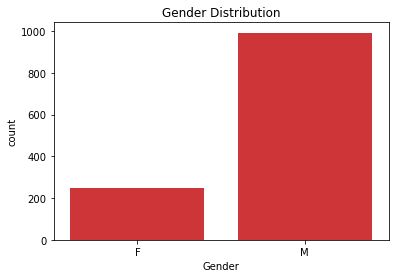

In [118]:
 g_counts=(list(df["Gender"].value_counts())) # total number of participants

print('Proportion of men in this survey: {:0.2f}% '.format((100* g_counts[0])/df["Gender"].count()))   #  percentage of men
print('Proportion of women in this survey: {:0.2f}% '.format((100* g_counts[1])/df["Gender"].count())) # percentage of women
      

      
sns.countplot(df['Gender'], color='#e81b1f')
plt.title('Gender Distribution')


A large majority of the survey participants were men. This is expected as the tech/IT industry is male dominated.



### Country:


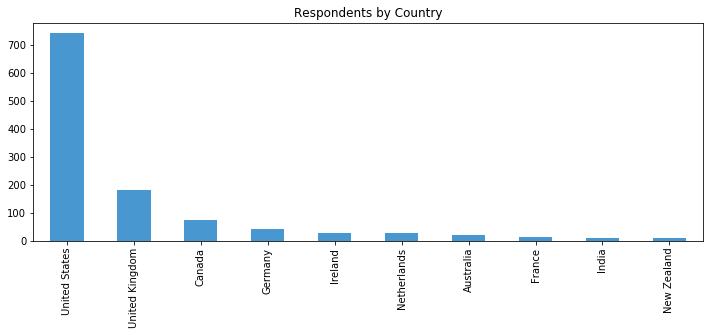

In [119]:
fig,ax = plt.subplots(figsize=(12,4))


df["Country"].value_counts().nlargest(10).plot(kind="bar",color='#4997D0') # displays the top ten countries
plt.title('Respondents by Country')


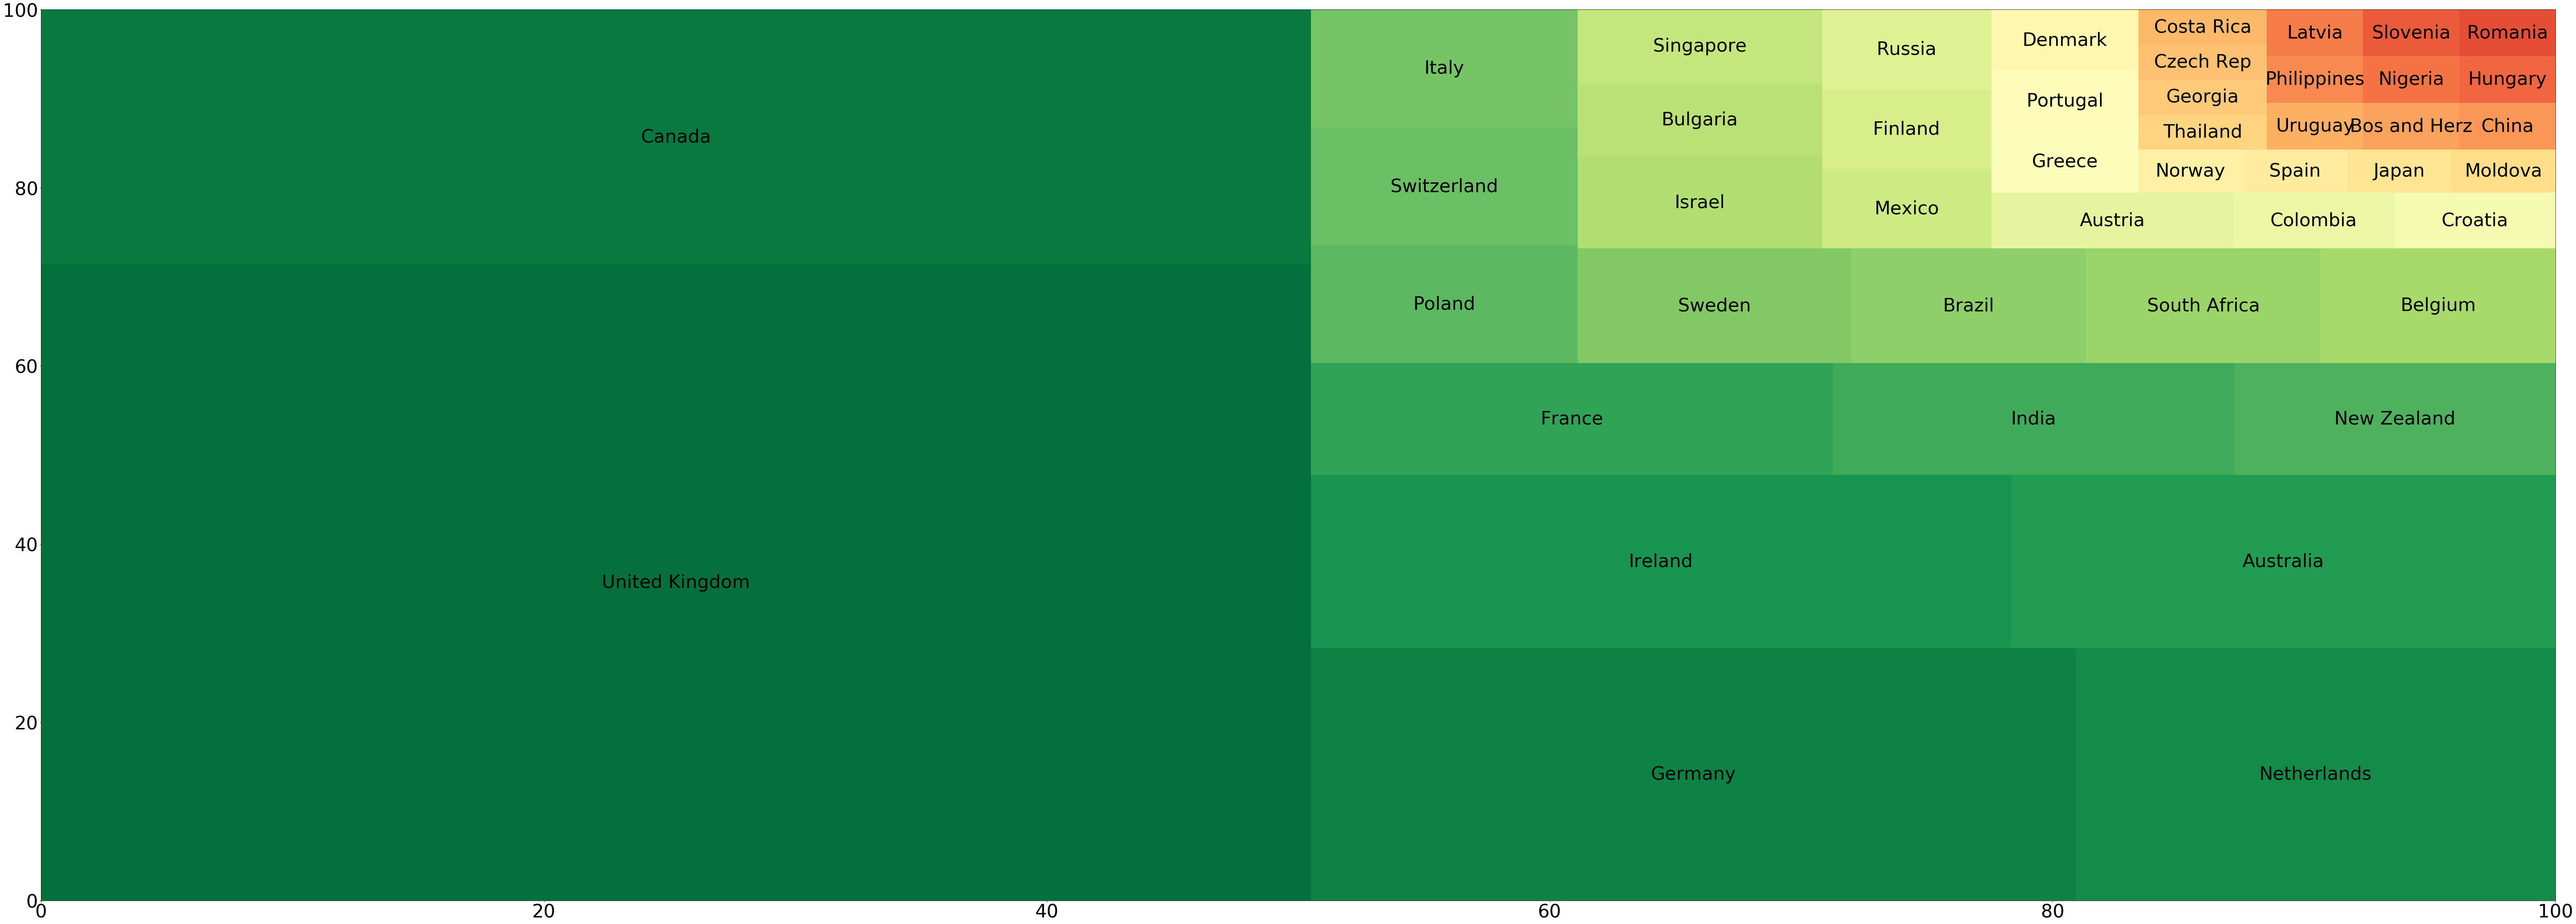

In [37]:
# visualising the other countries involved in the survey


country= df.loc[~df["Country"].str.contains("United States")] # removes US entries 


# produces a heatmap showing where participants are from

tree=country['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,label=tree.index,color=sns.color_palette('RdYlGn_r',52))
plt.rcParams.update({'font.size':45})
fig=plt.gcf()
fig.set_size_inches(110,40)
plt.show()


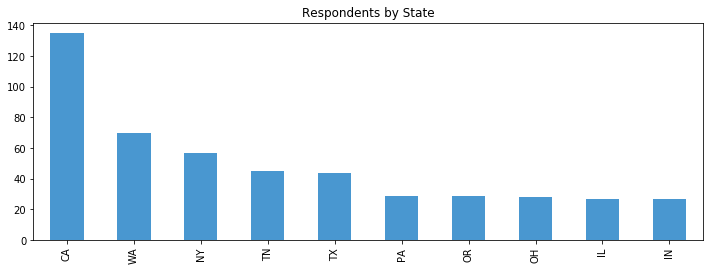

In [120]:
fig,ax = plt.subplots(figsize=(12,4))

df["state"].value_counts().nlargest(10).plot(kind="bar",color='#4997D0') #displays the top ten states
plt.title('Respondents by State')


The United States had the most respondents and Romania had the least. Within the US, Californians were the most common. CA is the home of Silicon Valley and is well known for its high concentration of tech businesses.

### Age:


The oldest employee is:  72.0
The youngest employee is:  18.0
The average age is:  32.12
The age of most participants is: 0    29.0
dtype: float64


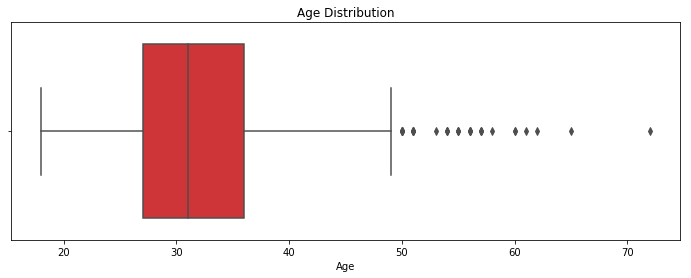

In [121]:

#max age 
print("The oldest employee is: ", df['Age'].dropna().max())
#min age 
print("The youngest employee is: ", df['Age'].dropna().min())
#mean age 
print("The average age is: ",  round(df['Age'].dropna().mean(), 2))
# most common age
print( "The age of most participants is:", df['Age'].dropna().mode())

males =df.loc[df['Gender'].str.contains('M')]
females=df.loc[df['Gender'].str.contains('F')]
# box plot showing age distribution
fig,ax = plt.subplots(figsize=(12,4))
sns.boxplot(df['Age'].dropna(),ax=ax,color='#e81b1f')  

plt.title('Age Distribution')


## Looking at the effect of age, workplace resources and gender on whether employees were receiving treatment




  Men, yes: 45.46%    Men, no: 54.54% 
Women, yes: 68.83%  Women, no: 31.17% 


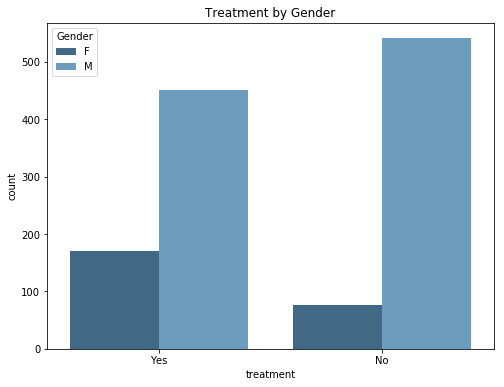

In [122]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x = 'treatment',palette= "Blues_d", hue= 'Gender',ax=ax)
plt.title('Treatment by Gender')


t_counts=(list(df.groupby("Gender").treatment.value_counts()))

print('  Men, yes: {:0.2f}% '.format((100* t_counts[3])/g_counts[0]),'  Men, no: {:0.2f}% '.format((100* t_counts[2])/g_counts[0]))  #  percentage of men
print('Women, yes: {:0.2f}% '.format((100* t_counts[0])/g_counts[1]),'Women, no: {:0.2f}% '.format((100* t_counts[1])/g_counts[1]))  # percentage of women


Most women were receiving treatment for their mental illness. The difference between the sub-groups was smaller for men, with about 9% more not getting treatment.

  Men, yes: 18.95%    Men, do not know: 28.73%    Men, no: 52.32% 
Women, yes: 23.08%  Women, do not know: 30.36%  Women, no: 46.56% 


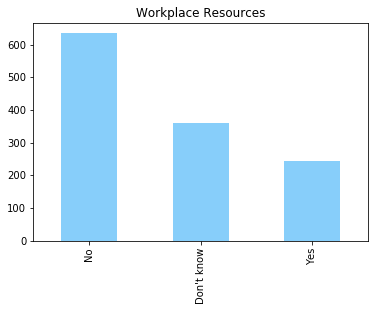

In [124]:
df["seek_help"].value_counts().plot(kind="bar",color='lightskyblue')

plt.title('Workplace Resources')

s_counts=(list(df.groupby("Gender").seek_help.value_counts()))

print('  Men, yes: {:0.2f}% '.format((100* s_counts[5])/g_counts[0]),'  Men, do not know: {:0.2f}% '.format((100* s_counts[4])/g_counts[0]),'  Men, no: {:0.2f}% '.format((100* s_counts[3])/g_counts[0]))  #  percentage of men
print('Women, yes: {:0.2f}% '.format((100* s_counts[2])/g_counts[1]),'Women, do not know: {:0.2f}% '.format((100* s_counts[1])/g_counts[1]),'Women, no: {:0.2f}% '.format((100* s_counts[0])/g_counts[1]))  # percentage of women




Most respondents have employers that don't provide resources to learn more about mental health issues and how to seek help. This highlights that companies could take more steps to promote positive mental health and support those experiencing mental ill health.

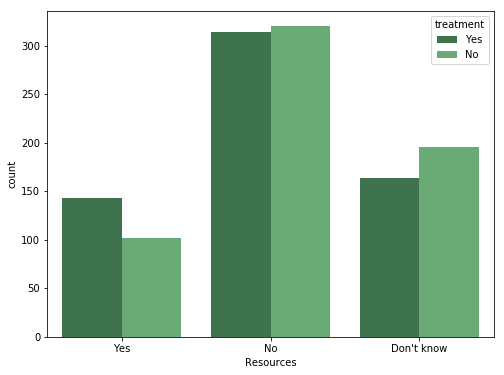

In [128]:

fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x = 'seek_help',palette= "Greens_d", hue= 'treatment',ax=ax)
ax.set_xlabel('Resources')



The data also shows that participants working at places providing resources were more likely to be receiving treatment for their issues.


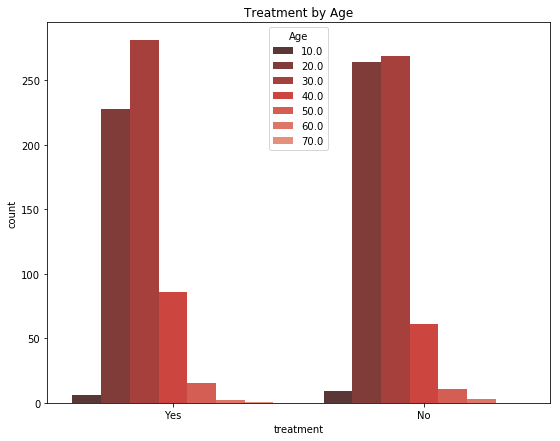

In [129]:
df['Age'] = df['Age'].replace([16, 17, 18, 19], 10) #teens
df['Age'] = df['Age'].replace([21, 22,23, 24,25, 26,27, 28,29], 20) # 20's
df['Age'] = df['Age'].replace([31, 32,33, 34,35, 36,37, 38,39], 30) # 30's
df['Age'] = df['Age'].replace([41, 42,43, 44,45, 46,47, 48,49], 40) # 40's
df['Age'] = df['Age'].replace([51, 52,53, 54,55, 56,57, 58,59], 50) # 50's
df['Age'] = df['Age'].replace([61, 62,63, 64,65, 66,67, 68,69], 60) # 60's
df['Age'] = df['Age'].replace([71, 72], 70) # 70's


fig,ax = plt.subplots(figsize=(9,7))
sns.countplot(data=df,x = 'treatment', palette='Reds_d', hue= 'Age',ax=ax)
plt.title('Treatment by Age')



All respondents in their 70's and most people in the 30's and 40's were getting treatment.

## Looking at the link between working remotely and how often a mental health condition interferes with work





In [130]:
print(df["remote_work"].value_counts()) # overview of how many people work remotely

No     868
Yes    371
Name: remote_work, dtype: int64


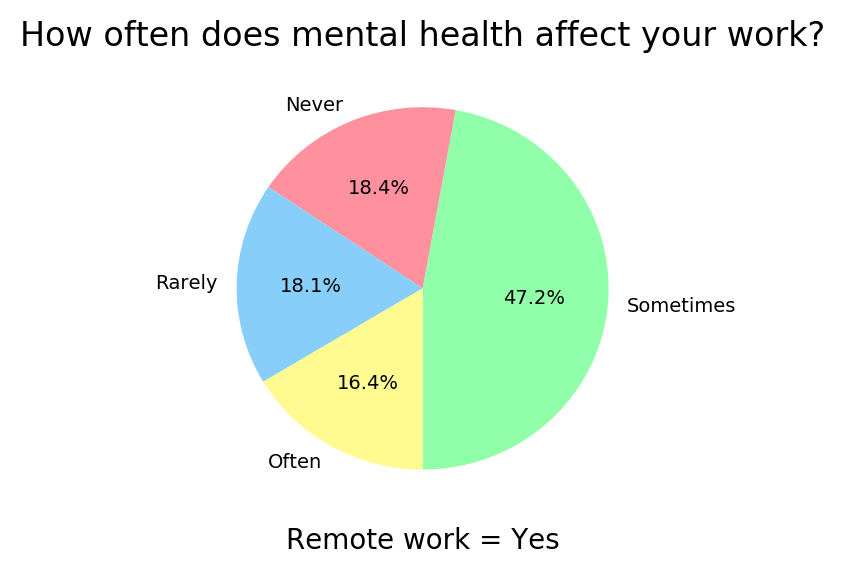

In [131]:
colors = ['#91ffa9','#ff919f', 'lightskyblue','#fffb91' ]
remote =df.loc[df['remote_work'].str.contains('Yes')] # people that do remote work

fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)

remote["work_interfere"].value_counts().plot(kind='pie', colors= colors, ax=ax, autopct='%1.1f%%', startangle=270, title="How often does mental health affect your work?", fontsize=7)
ax.set_ylabel('')
ax.set_xlabel('Remote work = Yes')



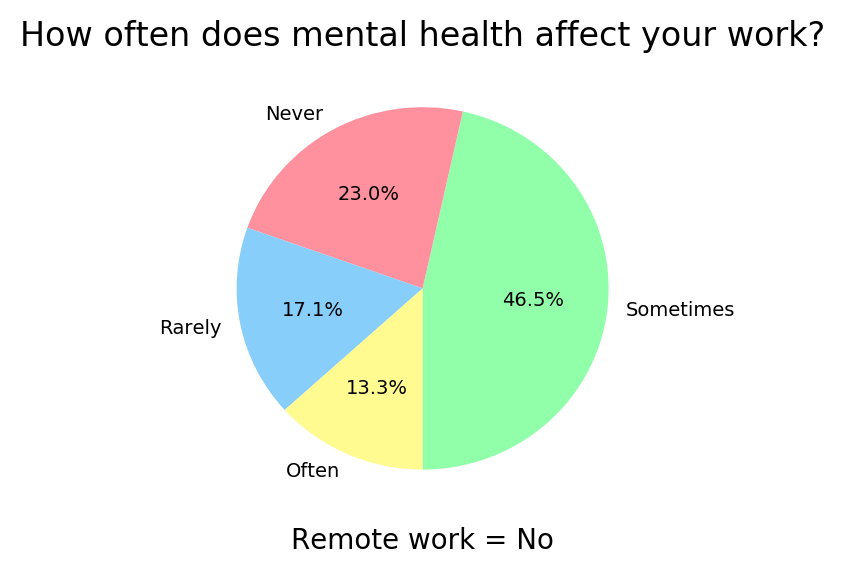

In [132]:
remote_n =df.loc[df['remote_work'].str.contains('No')] # people that don't do remote work

fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
remote_n["work_interfere"].value_counts().plot(kind='pie', colors= colors,ax=ax, autopct='%1.1f%%', startangle=270, title="How often does mental health affect your work?",fontsize=7)

ax.set_ylabel('')
ax.set_xlabel('Remote work = No')


Among those that do not work remotely, a larger proportion of people never had mental illness interfere with their work compared to their remote working counterparts. The "No" group also had a smaller percentage reply with "Often".

There tends to be more flexibility and control over hours when working remotely, so it is interesting that it did not have a more positive affect.


## Discussing a mental health issue in the workplace

The aim of this part of the analysis is to determine which factors are most important when discussing mental health with supervisors and colleagues. These will be identified using a Logistic Regression model to complete a binary classification task. Since the goal is to know how employers can be more accommodating only work-based features will be looked at.


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import operator
from sklearn.metrics import  accuracy_score
from sklearn.grid_search import GridSearchCV


#add a column with the target labels

#1= Employees that can talk about mental health to supervisors, colleagues or both
#0= Employees that do not feel comfortable discussing mental health issues in the workplace

df['label'] = 0
df['label'][df["supervisor"]== "Yes"]= 1  
df['label'][df["coworkers"]== "Yes"]= 1


# extract the relevant features
new=df.filter(items=["benefits","care_options","wellness_program","seek_help","anonymity","leave","mental_vs_physical","obs_consequence",'label'])
features = new.columns[:-1].tolist()
print (new.shape[0] - new.count()) # check for missing values

print("\ndata distribution:\n",df["label"].value_counts()) # check if data is skewed 




benefits              0
care_options          0
wellness_program      0
seek_help             0
anonymity             0
leave                 0
mental_vs_physical    0
obs_consequence       0
label                 0
dtype: int64

data distribution:
 0    700
1    539
Name: label, dtype: int64


C:\Users\Susan\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Susan\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [134]:

X = new[features]  # predictors
y = new['label']  # label
X=pd.get_dummies(X)  # encode data so that it is numerical and can be passed through to classififer


clf = LogisticRegression(penalty='l1',solver= "liblinear") # create classifier


#A grid search was done to find the optimal parameter values

parameters = {  
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }  

grid = GridSearchCV( clf,parameters, scoring='accuracy',  verbose=1,)
print("fitting model")
grid.fit(X, y)
print("finished fitting model")

print("Now printing metrics")

print('Best score:', grid.best_score_)
print('Best parameters:')
print(grid.best_params_)
print('scorer:') 
print(grid.scorer_)

print("Done metrics") 


fitting model
Fitting 3 folds for each of 7 candidates, totalling 21 fits
finished fitting model
Now printing metrics
Best score: 0.6658595641646489
Best parameters:
{'C': 0.1}
scorer:
make_scorer(accuracy_score)
Done metrics


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.2s finished


In [141]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) ### split into train and test sets


#The model was applied to the data and the features were ranked by importance

clf = LogisticRegression(penalty='l1', C=0.1,  solver='liblinear')
clf.fit(X_train,y_train)

coefs=np.transpose(clf.coef_)  #Coefficient of the features

feature_importance={}
for (feature,k) in zip(list(X_train),range(len(coefs))) : 
        feature_importance[feature]=abs(coefs[k])
sorted_features = sorted(feature_importance.items(), key=operator.itemgetter(1), reverse=True)
print("\nTop 10 most important features :\n", sorted_features[0:10])

clf_prediction = clf.predict(X_test)

print('\nAccuracy:\n', clf.score(X_test, y_test))







Top 10 most important features :
 [('mental_vs_physical_No', array([ 0.64404433])), ('mental_vs_physical_Yes', array([ 0.52788198])), ('leave_Very easy', array([ 0.46281118])), ("mental_vs_physical_Don't know", array([ 0.24985249])), ('obs_consequence_Yes', array([ 0.22117413])), ('benefits_No', array([ 0.12767084])), ("seek_help_Don't know", array([ 0.10097889])), ("anonymity_Don't know", array([ 0.08721848])), ('wellness_program_No', array([ 0.01578738])), ('anonymity_Yes', array([ 0.01551841]))]

Accuracy:
 0.661290322581


The most important features were:
* If your employer takes mental health as seriously as physical health
* How easy it is to take medical leave for a mental health condition
